# Training Neural Networks with Pandas and PyTorch 

## 0. Introduction to Neural Networks, Training, and Common Challenges

Material adapted from: https://bronwojtek.github.io/neuralnets-in-raw-python/docs/index.html

### Introduction

#### What are Neural Networks?
Neural networks are a subset of machine learning algorithms inspired by the structure and function of the human brain. They consist of interconnected layers of artificial neurons that process data and learn patterns.

#### Why are Neural Networks Useful?
- Capable of learning from data and making predictions.
- Used in various domains like image recognition, natural language processing, robotics, and control systems.
- Provide solutions to problems that are difficult to explicitly program.

#### Real-world Applications
- Image classification (e.g., facial recognition, medical diagnosis)
- Autonomous vehicles (e.g., self-driving cars using neural networks to process sensor data)
- Control systems (e.g., incubator temperature prediction and regulation)

### Basic Structure of a Neural Network

#### Neurons and Artificial Neurons
A neuron receives multiple inputs, applies weights, computes a weighted sum, and applies an activation function to produce an output.

![](assets/mcp-1a.png)

### Python Example Using PyTorch

**PyTorch** is an open-source machine learning framework primarily used for deep learning applications. It is known for its flexibility and dynamic computational graphs, which allow for efficient development and debugging.

#### Installation

To install PyTorch, visit [https://pytorch.org](https://pytorch.org) and follow the instructions based on your operating system, preferred version, and whether or not you have a CUDA-capable GPU. 

#### Key Features of PyTorch:
- **Tensors:** The core data structure in PyTorch is the tensor, which is similar to NumPy arrays but optimized for GPU-based operations.

- **Dynamic Computational Graphs:** PyTorch dynamically builds computation graphs at runtime, allowing for more flexibility in model development.

- **Neural Networks:** PyTorch provides a module called `torch.nn`, which simplifies building deep learning models like Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), etc.

- **Autograd:** PyTorch has automatic differentiation that helps compute gradients automatically for backpropagation in neural networks.


In [1]:
import torch
import torch.nn as nn

# Define a simple artificial neuron
class SimpleNeuron(nn.Module):
    def __init__(self):
        super(SimpleNeuron, self).__init__()
        self.weight = nn.Parameter(torch.tensor([0.5]))  # Example weight
        self.bias = nn.Parameter(torch.tensor([0.1]))    # Example bias
    
    def forward(self, x):
        return torch.sigmoid(x * self.weight + self.bias)  # Activation function

# Create a neuron and test an input
neuron = SimpleNeuron()
x = torch.tensor([1.0])  # Example input
output = neuron(x)
print(f"Neuron output: {output.item()}")

Neuron output: 0.6456562876701355


This example defines a simple neuron in PyTorch with a weight, bias, and a sigmoid activation function. Below is an extended version that plots the output of the neuron for different inputs.

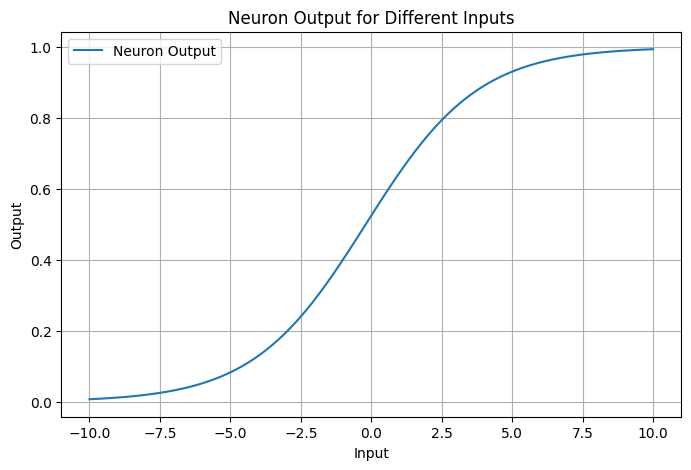

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define a simple artificial neuron
class SimpleNeuron(nn.Module):
    def __init__(self):
        super(SimpleNeuron, self).__init__()
        self.weight = nn.Parameter(torch.tensor([0.5]))  # Example weight
        self.bias = nn.Parameter(torch.tensor([0.1]))    # Example bias
    
    def forward(self, x):
        return torch.sigmoid(x * self.weight + self.bias)  # Activation function

# Create a neuron
neuron = SimpleNeuron()

# Generate input values
x_values = torch.linspace(-10, 10, 100)
out_values = neuron(x_values).detach().numpy()

# Plot neuron output
plt.figure(figsize=(8, 5))
plt.plot(x_values.numpy(), out_values, label='Neuron Output')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Neuron Output for Different Inputs')
plt.legend()
plt.grid()
plt.show()

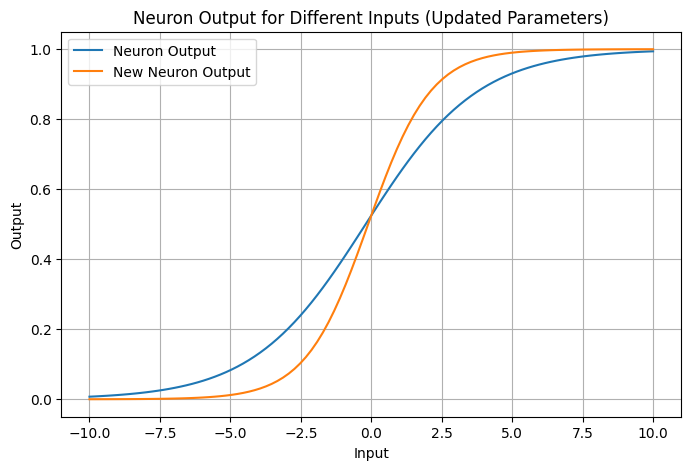

In [3]:
# Change the parameters of the neuron
neuron.weight = nn.Parameter(torch.tensor([0.9]))  # New weight
neuron.bias = nn.Parameter(torch.tensor([0.1]))    # New bias

# Generate new output values with the updated parameters
new_out_values = neuron(x_values).detach().numpy()

# Plot the new neuron output
plt.figure(figsize=(8, 5))
plt.plot(x_values.numpy(), out_values, label='Neuron Output')
plt.plot(x_values.numpy(), new_out_values, label='New Neuron Output')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Neuron Output for Different Inputs (Updated Parameters)')
plt.legend()
plt.grid()
plt.show()

This visualization helps understand how the neuron transforms different input values using the sigmoid activation function.

### Layers in a Neural Network
- Input Layer: Takes in raw data.
- Hidden Layers: Intermediate processing layers that learn representations.
- Output Layer: Produces the final prediction.

![](assets/Artificial-neural-network-of-multiple-layers-and-outputs-31.ppm)

#### Python Example Using PyTorch

In [4]:
import torch
import torch.nn as nn

# Define a simple neural network with an input, hidden, and output layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Input layer (2 neurons) -> Hidden layer (4 neurons)
        self.output = nn.Linear(4, 1)  # Hidden layer -> Output layer (1 neuron)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Activation function in hidden layer
        print(x)
        x = torch.sigmoid(self.output(x))  # Activation function in output layer
        return x

# Create a sample input and pass it through the network
nn_model = SimpleNN()
sample_input = torch.tensor([[0.5, 0.8]])  # Example input with two features
output = nn_model(sample_input)
print(f"Neural network output: {output.item()}")

tensor([[1.0773, 0.5680, 0.9961, 0.0000]], grad_fn=<ReluBackward0>)
Neural network output: 0.4287123680114746


This example demonstrates a simple neural network with an input layer of size 2, a hidden layer with 4 neurons, and an output layer with 1 neuron. ReLU is used in the hidden layer and Sigmoid in the output layer.
- Input Layer: Takes in raw data.
- Hidden Layers: Intermediate processing layers that learn representations.
- Output Layer: Produces the final prediction.

#### Python Example: Plotting Activation Functions

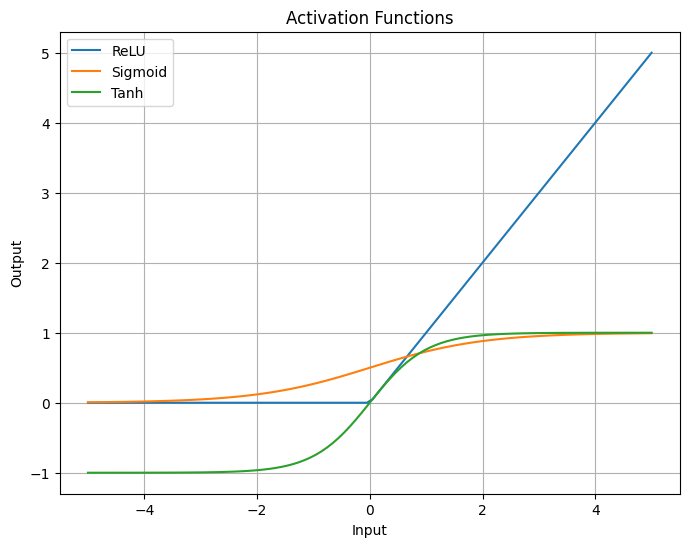

In [5]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

x = torch.linspace(-5, 5, 100)
relu = F.relu(x)
sigmoid = torch.sigmoid(x)
tanh = torch.tanh(x)

plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), relu.numpy(), label='ReLU')
plt.plot(x.numpy(), sigmoid.numpy(), label='Sigmoid')
plt.plot(x.numpy(), tanh.numpy(), label='Tanh')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Activation Functions')
plt.legend()
plt.grid()
plt.show()

This code visualizes the ReLU, Sigmoid, and Tanh activation functions, showing how they transform input values.
- **ReLU (Rectified Linear Unit)**: $ f(x) = max(0, x) $ (popular in deep learning)
- **Sigmoid**: $ f(x) = \frac{1}{1 + e^{-x}} $ (used for binary classification)
- **Tanh**: $ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $ (used for zero-centered outputs)

#### Example: Perceptron for Logic Gates
A perceptron can be trained to implement logic functions such as AND, OR, and NOT.

Example of a perceptron for an AND gate:
- Inputs: $ x_1, x_2 $
- Weights: $ w_1 = 1, w_2 = 1 $
- Bias: $ b = -1.5 $
- Activation function: Step function

In [6]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.weights = nn.Parameter(torch.tensor([1.0, 1.0]))  # Example weights
        self.bias = nn.Parameter(torch.tensor([-1.5]))  # Example bias
    
    def forward(self, x):
        return (torch.sum(x * self.weights) + self.bias >= 0).float()

# Create a perceptron instance
perceptron = Perceptron()

# Test input for AND gate
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
outputs = torch.tensor([perceptron(x).item() for x in inputs])
print(f"Perceptron Outputs: {outputs}")

Perceptron Outputs: tensor([0., 0., 0., 1.])


### Training a Neural Network

![](assets/supervised-learning.png)

#### Forward Propagation
1. Inputs are multiplied by weights.
2. Summed values are passed through activation functions.
3. The output is computed.

#### Loss Function
A loss function quantifies how well the model performs:
- Mean Squared Error (MSE): Common for regression problems.
- Cross-Entropy Loss: Used for classification problems.

#### Backpropagation
- Computes gradients of the loss function with respect to weights.
- Uses the chain rule to update weights in the direction that reduces loss.

#### Optimization Algorithms
- Stochastic Gradient Descent (SGD): Updates weights using a small subset of data.
- Adam (Adaptive Moment Estimation): Combines momentum and adaptive learning rates for faster convergence.

#### Example: Training a Simple Neural Network
We will train a simple neural network to predict income based on education level using a synthetic dataset.


This example implements a perceptron using PyTorch for an AND logic gate, using a step function as the activation function.
- Output: $ 1 $ if weighted sum $ \geq 0 $, else $ 0 $

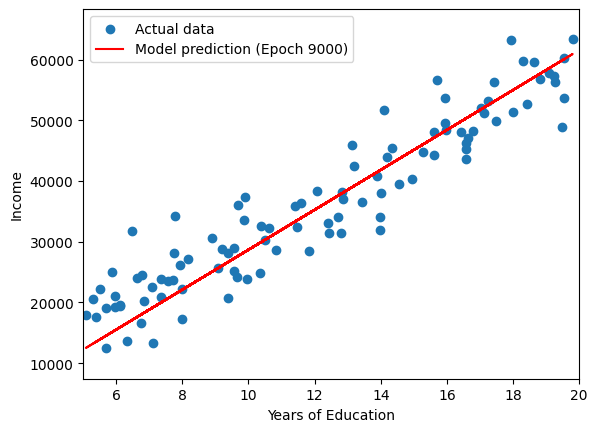

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset: education years vs. income
np.random.seed(42)
education_years = np.random.uniform(5, 20, 100)
income = education_years * 3000 + np.random.normal(0, 5000, 100)  # Adding noise

# Convert data to PyTorch tensors
x_train = torch.tensor(education_years, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(income, dtype=torch.float32).view(-1, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single-layer model
        
        # Explicitly setting parameters to extreme values for visualization
        with torch.no_grad():
            self.linear.weight.fill_(50.0)  # Outrageously large initial weight
            self.linear.bias.fill_(-50000.0)  # Outrageously large initial bias
    
    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training settings
num_epochs = 9000
plot_interval = 100  # Plot every 10 epochs

# Train the model
import IPython.display as display

fig, ax = plt.subplots()
ax.set_xlim(5, 20)  # Fix X-axis range
ax.set_ylim(min(income) - 5000, max(income) + 5000)  # Fix Y-axis range

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % plot_interval == 0:
        ax.clear()
        ax.set_xlim(5, 20)  # Fix X-axis range
        ax.set_ylim(min(income) - 5000, max(income) + 5000)  # Fix Y-axis range
        ax.scatter(education_years, income, label='Actual data')
        ax.plot(education_years, model(x_train).detach().numpy(), color='red', label=f'Model prediction (Epoch {epoch+1})')
        ax.set_xlabel('Years of Education')
        ax.set_ylabel('Income')
        ax.legend()
        display.clear_output(wait=True)
        display.display(fig)

plt.close()

In [8]:
# Print final model parameters
print(f"Model parameters after training: {model.state_dict()}")

Model parameters after training: OrderedDict([('linear.weight', tensor([[3288.7056]])), ('linear.bias', tensor([-4203.6025]))])


### Example: Training a Deep Neural Network

The next example show the training of a deeper neural network. It does not work very well, and that is due to the fact that the data is at very different scales (more on this in the next section)

KeyboardInterrupt: 

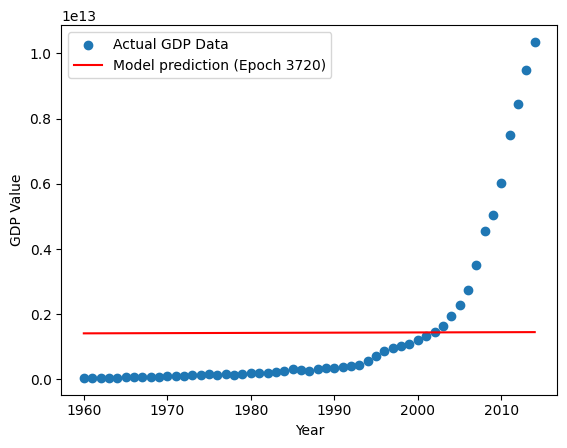

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython.display as display

# Load GDP dataset
file_path = "assets/gdp.csv"
df = pd.read_csv(file_path)

# Flag to enable or disable normalization
normalize_data = False

if normalize_data:
    # Normalize features (Year) and target (GDP Value)
    x_min, x_max = df["Year"].min(), df["Year"].max()
    y_min, y_max = df["Value"].min(), df["Value"].max()

    df["Year_norm"] = (df["Year"] - x_min) / (x_max - x_min)
    df["Value_norm"] = (df["Value"] - y_min) / (y_max - y_min)
    x_data = df["Year_norm"].values
    y_data = df["Value_norm"].values
else:
    x_data = df["Year"].values
    y_data = df["Value"].values

# Convert to PyTorch tensors
x_train = torch.tensor(x_data, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)

# Define a deeper neural network with different activation function
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.hidden1 = nn.Linear(1, 20)
        self.hidden2 = nn.Linear(20, 20)
        self.output = nn.Linear(20, 1)
        
    def forward(self, x):
        x = torch.relu(self.hidden1(x))  # Changed activation function to tanh
        x = torch.relu(self.hidden2(x))
        return self.output(x)

# Initialize model, loss function, and optimizer
model = DeepNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1.0)

# Training settings
num_epochs = 4000
plot_interval = 10  # Plot every 10000 epochs

# Train the model
fig, ax = plt.subplots()
ax.set_xlim(df["Year"].min(), df["Year"].max())  # Fix X-axis range to original values
ax.set_ylim(df["Value"].min() * 0.9, df["Value"].max() * 1.1)  # Fix Y-axis range to original values

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % plot_interval == 0:
        ax.clear()
        if normalize_data:
            ax.set_xlim(df["Year"].min(), df["Year"].max())  # Fix X-axis range
            ax.set_ylim(df["Value"].min() * 0.9, df["Value"].max() * 1.1)  # Fix Y-axis range
        ax.scatter(df["Year"], df["Value"], label='Actual GDP Data')
        
        # Transform predictions back to original scale if normalization is enabled
        predicted = model(x_train).detach().numpy()
        if normalize_data:
            predicted = predicted * (y_max - y_min) + y_min
        
        ax.plot(df["Year"], predicted, color='red', label=f'Model prediction (Epoch {epoch+1})')
        
        ax.set_xlabel('Year')
        ax.set_ylabel('GDP Value')
        ax.legend()
        display.clear_output(wait=True)
        display.display(fig)

plt.close()


### Normalization, Overfitting, Underfitting, and Generalization

#### Normalization

- When? Applied before training, as a preprocessing step.
- How? The entire dataset's feature values are normalized, usually by computing:
  - Mean and standard deviation for each feature.
  - Min-max scaling or standardization (e.g., making each feature have zero mean and unit variance). This is the method employed in the example below.
- Why? Ensures that all features are on the same scale, helping gradient-based optimization converge faster.


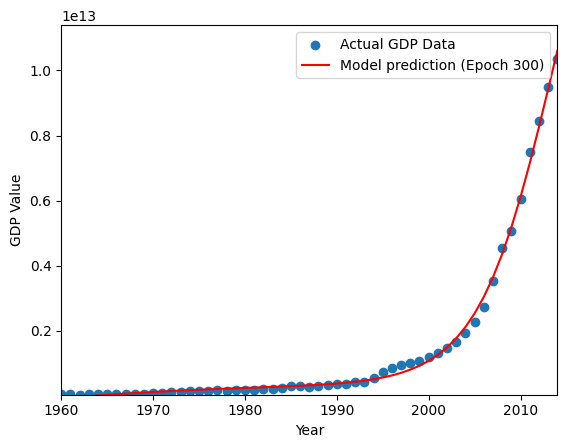

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython.display as display

# Load GDP dataset
file_path = "assets/gdp.csv"
df = pd.read_csv(file_path)

# Flag to enable or disable normalization
normalize_data = True

if normalize_data:
    # Normalize features (Year) and target (GDP Value)
    x_min, x_max = df["Year"].min(), df["Year"].max()
    y_min, y_max = df["Value"].min(), df["Value"].max()

    df["Year_norm"] = (df["Year"] - x_min) / (x_max - x_min)
    df["Value_norm"] = (df["Value"] - y_min) / (y_max - y_min)
    x_data = df["Year_norm"].values
    y_data = df["Value_norm"].values
else:
    x_data = df["Year"].values
    y_data = df["Value"].values

# Convert to PyTorch tensors
x_train = torch.tensor(x_data, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)

# Define a deeper neural network with different activation function
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.hidden1 = nn.Linear(1, 20)
        self.hidden2 = nn.Linear(20, 20)
        self.output = nn.Linear(20, 1)
        
    def forward(self, x):
        x = torch.tanh(self.hidden1(x))  # Changed activation function to tanh
        x = torch.tanh(self.hidden2(x))
        return self.output(x)

# Initialize model, loss function, and optimizer
model = DeepNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training settings
num_epochs = 300
plot_interval = 1  # Plot every 10000 epochs

# Train the model
fig, ax = plt.subplots()
ax.set_xlim(df["Year"].min(), df["Year"].max())  # Fix X-axis range to original values
ax.set_ylim(df["Value"].min() * 0.9, df["Value"].max() * 1.1)  # Fix Y-axis range to original values

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % plot_interval == 0:
        ax.clear()
        if normalize_data:
            ax.set_xlim(df["Year"].min(), df["Year"].max())  # Fix X-axis range
            ax.set_ylim(df["Value"].min() * 0.9, df["Value"].max() * 1.1)  # Fix Y-axis range
        ax.scatter(df["Year"], df["Value"], label='Actual GDP Data')
        
        # VERY IMPORTANT: Transform predictions back to original scale if normalization is enabled.
        predicted = model(x_train).detach().numpy()
        if normalize_data:
            predicted = predicted * (y_max - y_min) + y_min
        
        ax.plot(df["Year"], predicted, color='red', label=f'Model prediction (Epoch {epoch+1})')
        
        ax.set_xlabel('Year')
        ax.set_ylabel('GDP Value')
        ax.legend()
        display.clear_output(wait=True)
        display.display(fig)

plt.close()

#### Bias-Variance Tradeoff
- Underfitting: Model is too simple and does not capture patterns in data.
- Overfitting: Model memorizes training data but fails to generalize to new data.

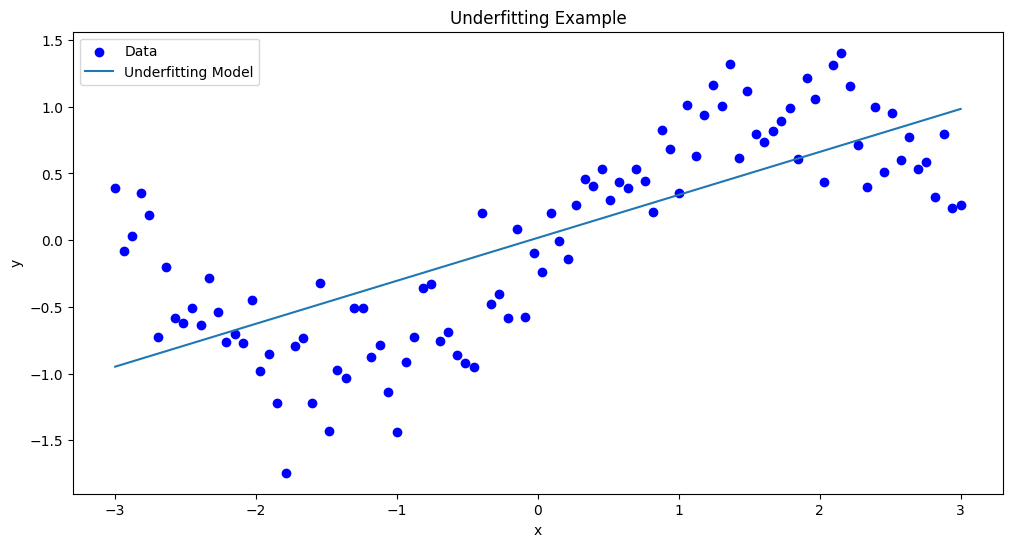

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic non-linear data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = np.sin(x) + 0.3 * np.random.normal(size=x.shape)

x_tensor = torch.FloatTensor(x).view(-1, 1)
y_tensor = torch.FloatTensor(y).view(-1, 1)

# Plot the synthetic data
def plot_data():
    plt.scatter(x, y, label="Data", color='b')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

# Function to plot the model's predictions
def plot_predictions(model, label):
    model.eval()
    with torch.no_grad():
        y_pred = model(x_tensor).numpy()
    plt.plot(x, y_pred, label=label)

### UNDERFITTING EXAMPLE ###

class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # A single linear layer

    def forward(self, x):
        return self.linear(x)

# Train the underfitting model
model_underfit = SimpleLinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model_underfit.parameters(), lr=0.01)

epochs = 500
for epoch in range(epochs):
    model_underfit.train()
    optimizer.zero_grad()
    y_pred = model_underfit(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

plt.figure(figsize=(12, 6))
plot_data()
plot_predictions(model_underfit, label="Underfitting Model")
plt.title("Underfitting Example")
plt.legend()
plt.show()

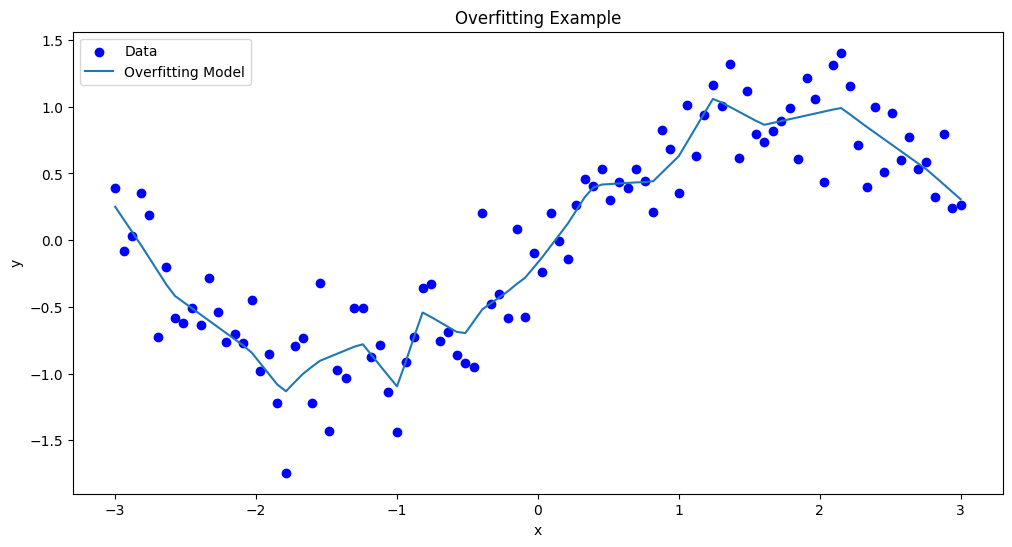

In [ ]:
### OVERFITTING EXAMPLE ###

class OverfitModel(nn.Module):
    def __init__(self):
        super(OverfitModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Train the overfitting model
model_overfit = OverfitModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_overfit.parameters(), lr=0.01)

epochs = 500
for epoch in range(epochs):
    model_overfit.train()
    optimizer.zero_grad()
    y_pred = model_overfit(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

plt.figure(figsize=(12, 6))
plot_data()
plot_predictions(model_overfit, label="Overfitting Model")
plt.title("Overfitting Example")
plt.legend()
plt.show()


#### Preventing Overfitting: L2 regularization

L2 regularization is a technique used in machine learning to **prevent overfitting** by penalizing large weight values. This is achieved by adding a regularization term to the **loss function**, which discourages the model from having excessively large weights.

In L2 regularization, a penalty proportional to the **square of the weights** is added to the loss function:

$$
Loss = \text{MSE} + \lambda \sum w^2
$$

Where:
- $ \text{MSE} $ is the Mean Squared Error loss.
- $ \lambda $ (regularization strength) controls how much regularization is applied.
- $ w $ represents the model weights.

By penalizing large weights, L2 regularization forces the model to distribute learning across all features rather than relying on a few high-weighted parameters.

In the **overfitting example above**, L2 regularization is applied through the `weight_decay` parameter in the optimizer:

```python
optimizer = optim.Adam(model_overfit.parameters(), lr=0.01, weight_decay=0.01)
```

Here, `weight_decay=0.01` is equivalent to setting **λ = 0.01** in the L2 loss formula.

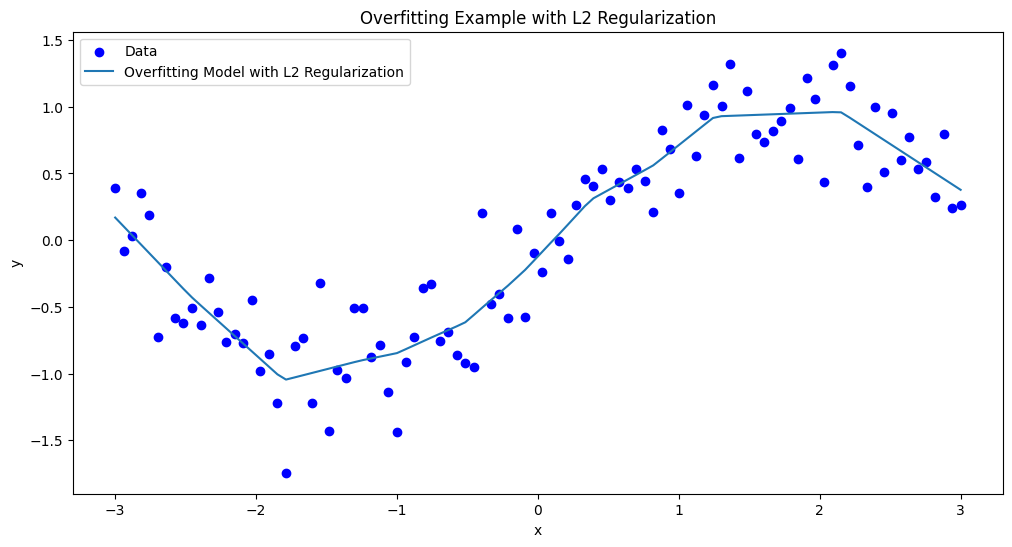

In [ ]:
### OVERFITTING EXAMPLE WITH L2 REGULARIZATION ###

# Train the overfitting model with L2 regularization
model_overfit = OverfitModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_overfit.parameters(), lr=0.01, weight_decay=0.001)  # L2 Regularization via weight_decay

epochs = 500
for epoch in range(epochs):
    model_overfit.train()
    optimizer.zero_grad()
    y_pred = model_overfit(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

plt.figure(figsize=(12, 6))
plot_data()
plot_predictions(model_overfit, label="Overfitting Model with L2 Regularization")
plt.title("Overfitting Example with L2 Regularization")
plt.legend()
plt.show()


### Validation and Testing - Split dataset into training, validation, and test sets.

Epoch 1/50 - Train Loss: 0.3730 - Val Loss: 0.2206
Epoch 2/50 - Train Loss: 0.2620 - Val Loss: 0.2471
Epoch 3/50 - Train Loss: 0.2417 - Val Loss: 0.2063
Epoch 4/50 - Train Loss: 0.2276 - Val Loss: 0.2107
Epoch 5/50 - Train Loss: 0.2012 - Val Loss: 0.1940
Epoch 6/50 - Train Loss: 0.1979 - Val Loss: 0.1949
Epoch 7/50 - Train Loss: 0.1997 - Val Loss: 0.1866
Epoch 8/50 - Train Loss: 0.2030 - Val Loss: 0.1692
Epoch 9/50 - Train Loss: 0.1972 - Val Loss: 0.1836
Epoch 10/50 - Train Loss: 0.1838 - Val Loss: 0.1908
Epoch 11/50 - Train Loss: 0.1686 - Val Loss: 0.1631
Epoch 12/50 - Train Loss: 0.1764 - Val Loss: 0.1901
Epoch 13/50 - Train Loss: 0.1919 - Val Loss: 0.1517
Epoch 14/50 - Train Loss: 0.1702 - Val Loss: 0.1731
Epoch 15/50 - Train Loss: 0.1606 - Val Loss: 0.1545
Epoch 16/50 - Train Loss: 0.1585 - Val Loss: 0.1476
Epoch 17/50 - Train Loss: 0.1576 - Val Loss: 0.1789
Epoch 18/50 - Train Loss: 0.1410 - Val Loss: 0.1371
Epoch 19/50 - Train Loss: 0.1555 - Val Loss: 0.1533
Epoch 20/50 - Train L

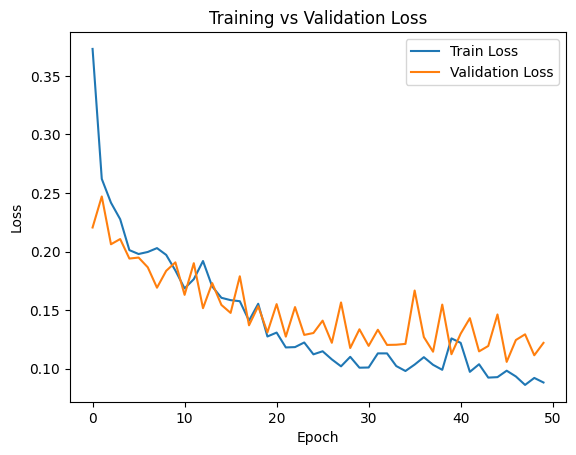

Final Test Loss: 0.0715


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
x = np.linspace(-3, 3, 300)
y = np.sin(x) + 0.3 * np.random.normal(size=x.shape)

data_tensor = torch.FloatTensor(x).view(-1, 1)
labels_tensor = torch.FloatTensor(y).view(-1, 1)

def split_dataset(data_ts, labels, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1"
    
    dataset = data.TensorDataset(data_ts, labels)
    total_size = len(dataset)
    train_size = int(train_ratio * total_size)
    val_size = int(val_ratio * total_size)
    test_size = total_size - train_size - val_size  # Ensure full coverage
    
    train_set, val_set, test_set = data.random_split(dataset, [train_size, val_size, test_size])
    return train_set, val_set, test_set

# Split dataset
train_set, val_set, test_set = split_dataset(data_tensor, labels_tensor)

# Create DataLoaders
batch_size = 16
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size)
test_loader = data.DataLoader(test_set, batch_size=batch_size)

# Define a simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop with validation
epochs = 50
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))
    
    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))
    
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f}")

# Plot training and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Final evaluation on test set
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
print(f"Final Test Loss: {test_loss / len(test_loader):.4f}")


#### Use cross-validation to obtain more reliable assessment

K-Fold Cross-Validation is used to evaluate a model's performance by splitting the dataset into multiple parts (folds) and training the model multiple times, each time using a different portion of the data for training and validation.

How K-Fold Cross-Validation Works
1. Split the dataset into `K` equal parts (folds).
2. Train `K` models, each time using:
   - `K-1` folds for training.
   - The remaining 1 fold for validation.
3. Repeat `K` times, rotating the validation set each time.
4. Compute the average performance across all folds.

When to Use K-Fold Cross-Validation
- When you have limited data and need more robust evaluation.
- When hyperparameter tuning is needed (e.g., grid search).
- When you want to compare models objectively.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Generate synthetic dataset
np.random.seed(0)
x = np.linspace(-3, 3, 300)
y = np.sin(x) + 0.3 * np.random.normal(size=x.shape)

x_tensor = torch.FloatTensor(x).view(-1, 1)
y_tensor = torch.FloatTensor(y).view(-1, 1)

# Create a TensorDataset
dataset = data.TensorDataset(x_tensor, y_tensor)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Set up k-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store loss values
fold_train_losses = []
fold_val_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"\nFold {fold+1}/{k_folds}")

    # Create data samplers
    train_sampler = data.SubsetRandomSampler(train_idx)
    val_sampler = data.SubsetRandomSampler(val_idx)
    
    # Create DataLoaders
    batch_size = 16
    train_loader = data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
    val_loader = data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)
    
    # Initialize model, loss function, and optimizer
    model = SimpleNN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    # Train model
    epochs = 50
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))
        
        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
    
    # Store fold results
    fold_train_losses.append(train_losses[-1])
    fold_val_losses.append(val_losses[-1])

    print(f"Fold {fold+1}: Train Loss = {train_losses[-1]:.4f}, Val Loss = {val_losses[-1]:.4f}")

# Compute mean loss across all folds
mean_train_loss = np.mean(fold_train_losses)
mean_val_loss = np.mean(fold_val_losses)
print(f"\nAverage Train Loss: {mean_train_loss:.4f}, Average Validation Loss: {mean_val_loss:.4f}")



Fold 1/5
Fold 1: Train Loss = 0.0863, Val Loss = 0.1040

Fold 2/5
Fold 2: Train Loss = 0.0946, Val Loss = 0.0857

Fold 3/5
Fold 3: Train Loss = 0.1070, Val Loss = 0.0973

Fold 4/5
Fold 4: Train Loss = 0.0922, Val Loss = 0.0776

Fold 5/5
Fold 5: Train Loss = 0.0912, Val Loss = 0.0924

Average Train Loss: 0.0943, Average Validation Loss: 0.0914


## 1. Pandas

Pandas is a powerful and widely-used Python library for data manipulation and analysis. It provides data structures like **DataFrames** and **Series** that are essential for working with structured data (e.g., CSV files, databases, and Excel files).

You can install Pandas using `pip` by running the following command in your terminal or command prompt:

In [ ]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Key Features of Pandas

- **DataFrame and Series Objects:** Pandas introduces two core data structures:
  - **Series:** A one-dimensional array with labeled indices.
  - **DataFrame:** A two-dimensional table (rows and columns) that can handle different data types (e.g., integers, strings, floats).
- **Data Handling:** You can easily handle missing data, filter, and clean your datasets using intuitive commands.
- **Data Analysis and Manipulation:** Pandas makes it simple to group, pivot, merge, and join datasets.

### Basic Usage Example

In [ ]:
import pandas as pd

# Creating a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Occupation': ['Engineer', 'Doctor', 'Artist']
}
df = pd.DataFrame(data)

# Viewing the DataFrame
print(df)

# Accessing a column
ages = df['Age']

# Filtering rows
adults = df[df['Age'] > 28]

# Summary statistics
summary = df.describe()
print(summary)

      Name  Age Occupation
0    Alice   25   Engineer
1      Bob   30     Doctor
2  Charlie   35     Artist
        Age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0


### Loading a CSV File

Pandas makes it easy to load and analyze data from CSV files. Here’s an example of how to load a CSV file using Pandas:

In [ ]:
# Get CSV file from an incubator dataset
import sys
import os

# Get the current working directory.
current_dir = os.getcwd()

assert os.path.basename(current_dir) == '3-Physics-Modelling', 'Current directory is not 3-Physics-Modelling'

# Get the parent directory. Should be the root of the repository
parent_dir = os.path.dirname(current_dir)

# The root of the repo should contain the incubator_dt folder. Otherwise something went wrong in 0-Pre-requisites.
assert os.path.exists(os.path.join(parent_dir, 'incubator_dt')), 'incubator_dt folder not found in the repository root'

csv_file_path = os.path.join(parent_dir, 'incubator_dt', 'software', 'incubator', 'datasets', '20230501_calibration_empty_system', '20230501_calibration_empty_system.csv')

assert os.path.exists(csv_file_path), '20230501_calibration_empty_system.csv not found in the incubator repository.'

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Create a new column derived from another one, but converting from boolean to int.
df['heater_on_int'] = df['heater_on'].astype(int)

# Display the first few rows of the dataframe
df.head()

,time,t1,time_t1,t2,time_t2,t3,time_t3,average_temperature,heater_on,fan_on,execution_interval,elapsed,heater_on_int
0,1682912554273107499,23.062,1682912554192856639,24.312,1682912554232822932,22.125,1682912554272705263,23.6870,False,False,3.0,1.025402,0
1,1682912557313698460,23.062,1682912557272792494,24.375,1682912557232848441,22.125,1682912557313344724,23.7185,False,False,3.0,1.064928,0
2,1682912560282455551,23.062,1682912560232232220,24.375,1682912560192178595,22.062,1682912560282224276,23.7185,False,False,3.0,1.031638,0
3,1682912563313803672,23.125,1682912563273056592,24.375,1682912563232827969,22.062,1682912563313317234,23.7500,False,False,3.0,1.061013,0
4,1682912566283347240,23.125,1682912566243313892,24.375,1682912566192896637,22.062,1682912566282895616,23.7500,False,False,3.0,1.028555,0


In this example, we use the `pd.read_csv()` function to load the data into a Pandas DataFrame. The `df.head()` function shows the first few rows of the dataset.

### Plotting Data

Pandas integrates well with Matplotlib to provide easy-to-use plotting functionalities. Here's how to plot data from the CSV file:

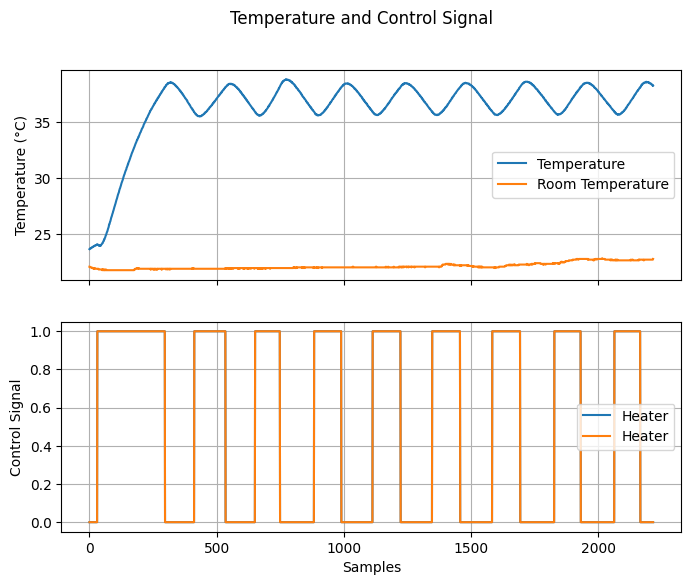

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with shared X-axis of the data to be used in training.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot temperature data on the first subplot
ax1.plot(df.index, df.average_temperature, label='Temperature')
ax1.plot(df.index, df.t3, label='Room Temperature')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()

ax1.grid(True)

# Plot control signal data on the second subplot
ax2.plot(df.index, df.heater_on, label='Heater')
ax2.plot(df.index, df.heater_on_int, label='Heater') # just to verify that the conversion is correct
ax2.set_xlabel('Samples')
ax2.set_ylabel('Control Signal')
ax2.legend()

ax2.grid(True)

# Add a title to the shared X-axis
fig.suptitle('Temperature and Control Signal')

# Show the plots
plt.show()